In [1]:
import pandas as pd
import numpy as np
from parsing import parse_chart_name

In [2]:
Readability = pd.read_csv('MLR.csv')
Readability.head()

,question_id,answer,source
0,PD-MB-dd12-dh5-we05-sano-ro000-pa01-ad09-ftse-...,yes,prolific-batch1
1,PB-CL-dd06-gr00-pano-sa00-bw6-boh-bs000-e00a1-...,yes,prolific-batch1
2,PB-CR-dd06-gr00-pa03-sano-bw6-bov-bs000-e11a1-...,yes,prolific-batch1
3,PD-MB-dd02-dh5-we05-sano-ro000-pano-ad09-ftse-...,yes,prolific-batch1
4,PD-CL-dd12-dh5-we05-sano-ro000-pa01-ad09-ftse-...,yes,prolific-batch1


In [3]:
len(Readability)

40044

In [4]:
Readability.answer.value_counts()

yes     29493
no      10141
skip      410
Name: answer, dtype: int64

In [5]:
Trust = pd.read_csv('MLT.csv')
Trust.head()

,question_id,answer,source
0,PD-MB-dd12-dh5-we05-sa00-ro000-pa01-ad09-ftse-...,yes,prolific-batch1
1,PB-MG-dd06-gr00-pa05-sa00-bw6-bov-bs000-e11a1-...,no,prolific-batch1
2,PB-CR-dd06-gr00-pano-sa00-bw6-boh-bs000-e00a1-...,no,prolific-batch1
3,PP-MG-dd06-we05-sa00-ro000-pa05-ad09-ftse-fs16...,yes,prolific-batch1
4,PB-CL-dd06-gr00-pano-sa00-bw6-boh-bs000-e00a1-...,no,prolific-batch1


In [6]:
len(Trust)

39936

In [7]:
Trust.answer.value_counts()

yes     21244
no      18161
skip      531
Name: answer, dtype: int64

In [8]:
R = Readability.loc[:, ['question_id', 'answer']]
R['answer'] = R['answer'].apply(lambda x: 1 if x == 'yes' else 0)
R = R.groupby(by='question_id').mean().reset_index()
R.head()

,question_id,answer
0,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e00a1-...,0.740000
1,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e10a1-...,0.578947
2,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e11a1-...,0.712766
3,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e00a1-...,0.742574
4,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e10a1-...,0.542553


In [9]:
T = Trust.loc[:, ['question_id', 'answer']]
T['answer'] = T['answer'].apply(lambda x: 1 if x == 'yes' else 0)
T = T.groupby(by='question_id').mean().reset_index()
T.head()

,question_id,answer
0,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e00a1-...,0.594059
1,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e10a1-...,0.558824
2,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e11a1-...,0.510000
3,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e00a1-...,0.575758
4,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e10a1-...,0.555556


In [10]:
df = R.merge(T, on='question_id', how='outer').set_axis(['question_id', 'yes_R', 'yes_T'], axis='columns')

In [11]:
df.head()

,question_id,yes_R,yes_T
0,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e00a1-...,0.740000,0.594059
1,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e10a1-...,0.578947,0.558824
2,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e11a1-...,0.712766,0.510000
3,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e00a1-...,0.742574,0.575758
4,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e10a1-...,0.542553,0.555556


In [12]:
data = parse_chart_name(df, 'question_id')
data.head()

,question_id,yes_R,yes_T,type,color,data,source,donut_hole,grid,wedge_explode,...,font,legend_loc,bar_orientation,bar_spacing,bar_width,sample,font_size,annotation_dist,error_bar,label
0,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e00a1-...,0.740000,0.594059,Bar,CL,6,True,NaN,00,NaN,...,se,ur,H,0.0,0.6,False,16,NaN,None,True
1,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e10a1-...,0.578947,0.558824,Bar,CL,6,True,NaN,00,NaN,...,se,ur,H,0.0,0.6,False,16,NaN,Line,True
2,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e11a1-...,0.712766,0.510000,Bar,CL,6,True,NaN,00,NaN,...,se,ur,H,0.0,0.6,False,16,NaN,Cap,True
3,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e00a1-...,0.742574,0.575758,Bar,CL,6,True,NaN,00,NaN,...,se,ur,V,0.0,0.6,False,16,NaN,None,True
4,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e10a1-...,0.542553,0.555556,Bar,CL,6,True,NaN,00,NaN,...,se,ur,V,0.0,0.6,False,16,NaN,Line,True


In [13]:
data.columns

Index(['question_id', 'yes_R', 'yes_T', 'type', 'color', 'data', 'source',
       'donut_hole', 'grid', 'wedge_explode', 'rotation', 'precision', 'font',
       'legend_loc', 'bar_orientation', 'bar_spacing', 'bar_width', 'sample',
       'font_size', 'annotation_dist', 'error_bar', 'label'],
      dtype='object')

In [14]:
columns = data.columns[3:]
columns

Index(['type', 'color', 'data', 'source', 'donut_hole', 'grid',
       'wedge_explode', 'rotation', 'precision', 'font', 'legend_loc',
       'bar_orientation', 'bar_spacing', 'bar_width', 'sample', 'font_size',
       'annotation_dist', 'error_bar', 'label'],
      dtype='object')

In [15]:
for c in columns:
    print(data[c].value_counts())
    print('---------------------------')
    print('Is NaN?')
    print(data[c].isna().value_counts())
    print()

Bar      208
Donut     96
Pie       96
Name: type, dtype: int64
---------------------------
Is NaN?
False    400
Name: type, dtype: int64

MB    100
CL    100
MG    100
CR    100
Name: color, dtype: int64
---------------------------
Is NaN?
False    400
Name: color, dtype: int64

6     272
2      64
12     64
Name: data, dtype: int64
---------------------------
Is NaN?
False    400
Name: data, dtype: int64

False    200
True     200
Name: source, dtype: int64
---------------------------
Is NaN?
False    400
Name: source, dtype: int64

0.5    96
Name: donut_hole, dtype: int64
---------------------------
Is NaN?
True     304
False     96
Name: donut_hole, dtype: int64

00    208
Name: grid, dtype: int64
---------------------------
Is NaN?
False    208
True     192
Name: grid, dtype: int64

5.0    192
Name: wedge_explode, dtype: int64
---------------------------
Is NaN?
True     208
False    192
Name: wedge_explode, dtype: int64

0.0    192
Name: rotation, dtype: int64
-------------------

In [16]:
data.head()

,question_id,yes_R,yes_T,type,color,data,source,donut_hole,grid,wedge_explode,...,font,legend_loc,bar_orientation,bar_spacing,bar_width,sample,font_size,annotation_dist,error_bar,label
0,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e00a1-...,0.740000,0.594059,Bar,CL,6,True,NaN,00,NaN,...,se,ur,H,0.0,0.6,False,16,NaN,None,True
1,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e10a1-...,0.578947,0.558824,Bar,CL,6,True,NaN,00,NaN,...,se,ur,H,0.0,0.6,False,16,NaN,Line,True
2,PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e11a1-...,0.712766,0.510000,Bar,CL,6,True,NaN,00,NaN,...,se,ur,H,0.0,0.6,False,16,NaN,Cap,True
3,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e00a1-...,0.742574,0.575758,Bar,CL,6,True,NaN,00,NaN,...,se,ur,V,0.0,0.6,False,16,NaN,None,True
4,PB-CL-dd06-gr00-pa01-sa00-bw6-bov-bs000-e10a1-...,0.542553,0.555556,Bar,CL,6,True,NaN,00,NaN,...,se,ur,V,0.0,0.6,False,16,NaN,Line,True


In [17]:
data['question_id'][0]

'PB-CL-dd06-gr00-pa01-sa00-bw6-boh-bs000-e00a1-ftse-fs16-llur-sm0.png'

In [18]:
selected_columns = ['type', 'color', 'data', 'source', 'precision', 'legend_loc', \
                    'bar_orientation', 'error_bar', 'label', 'yes_R', 'yes_T']

In [19]:
# bar_orientantion's NaNs can be swapped with 0 since it differentiates some of the bar_charts
# error_bar differentiates bar_charts
# label differentiates bar_charts
# out = ['donout_hole', 'grid', 'wedge_explode', 'rotation', 'font', 'bar_spacing', 'bar_width', 'sample', 'font_size', 'annotation_dist']

In [20]:
len(columns)

19

In [21]:
ML_df = data.loc[:, selected_columns]

In [22]:
ML_df.head()

,type,color,data,source,precision,legend_loc,bar_orientation,error_bar,label,yes_R,yes_T
0,Bar,CL,6,True,1.0,ur,H,None,True,0.740000,0.594059
1,Bar,CL,6,True,1.0,ur,H,Line,True,0.578947,0.558824
2,Bar,CL,6,True,1.0,ur,H,Cap,True,0.712766,0.510000
3,Bar,CL,6,True,1.0,ur,V,None,True,0.742574,0.575758
4,Bar,CL,6,True,1.0,ur,V,Line,True,0.542553,0.555556


In [23]:
ML_df['precision'].value_counts()

0.0    112
3.0     96
5.0     96
1.0     96
Name: precision, dtype: int64

In [24]:
ML_df['bar_orientation'].fillna('N', inplace=True)

In [25]:
ML_df['error_bar'].fillna('X', inplace=True)

In [26]:
ML_df['label'].fillna('N', inplace=True)

In [27]:
ML_df.isna().value_counts()

type   color  data   source  precision  legend_loc  bar_orientation  error_bar  label  yes_R  yes_T
False  False  False  False   False      False       False            False      False  False  False    400
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
type_encoder = LabelEncoder()
ML_df['type'] = type_encoder.fit_transform(ML_df['type'])

In [30]:
bar_orientation_encoder = LabelEncoder()
ML_df['bar_orientation'] = type_encoder.fit_transform(ML_df['bar_orientation'])

In [31]:
legend_loc_encoder = LabelEncoder()
ML_df['legend_loc'] = type_encoder.fit_transform(ML_df['legend_loc'])

In [32]:
error_bar_encoder = LabelEncoder()
ML_df['error_bar'] = type_encoder.fit_transform(ML_df['error_bar'])

In [33]:
label_encoder = LabelEncoder()
ML_df['label'] = label_encoder.fit_transform(ML_df['label'].apply(lambda x: str(x)))

In [34]:
color_encoder = LabelEncoder()
ML_df['color'] = type_encoder.fit_transform(ML_df['color'])

In [35]:
ML_df.head()

,type,color,data,source,precision,legend_loc,bar_orientation,error_bar,label,yes_R,yes_T
0,0,0,6,True,1.0,1,0,2,2,0.740000,0.594059
1,0,0,6,True,1.0,1,0,1,2,0.578947,0.558824
2,0,0,6,True,1.0,1,0,0,2,0.712766,0.510000
3,0,0,6,True,1.0,1,2,2,2,0.742574,0.575758
4,0,0,6,True,1.0,1,2,1,2,0.542553,0.555556


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

###### There is no correlation between yes_R and yes_T so we would run 2 separate analysis

###### Readability

In [37]:
X = ML_df.iloc[:, :-2]
X.shape

(400, 9)

In [38]:
y = ML_df['yes_R']
y.shape

(400,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.004895724214260198

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
regr = RandomForestRegressor(max_depth=10, random_state=42)

In [43]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [44]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.004895724214260198

### Let's see if trust helps a bit, although there is no correlation between trust and read

In [45]:
selected_cols = list(ML_df.columns)
selected_cols.remove('yes_R')
X_R = ML_df.loc[:, selected_cols]

In [46]:
X_R[:2]

,type,color,data,source,precision,legend_loc,bar_orientation,error_bar,label,yes_T
0,0,0,6,True,1.0,1,0,2,2,0.594059
1,0,0,6,True,1.0,1,0,1,2,0.558824


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_R, y, test_size=0.33, random_state=42)

In [48]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.004501709193211895

##### We can say that it improved a bit the score, but preferably we won't use it.

### XGBoost

In [49]:
from xgboost import XGBRegressor

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
xgbregressor = XGBRegressor(n_estimators = 10, seed = 42)
xgbregressor.fit(X_train, y_train)
y_pred = xgbregressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.00298047633038861

### SVR

In [52]:
from sklearn.svm import SVR

In [53]:
regressor = SVR(C=1.0, epsilon=0.2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.01049491757084336

### Linear

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0036923531197519616

### Lasso

In [55]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.011651431696244652

In [56]:
# do some unsupervised to see interesting things
# for this you will have to turn data with PCA and plot the clusters

In [57]:
# do the PCA and create the viz for the regression line

In [58]:
from xgboost import plot_tree
from xgboost import to_graphviz
from xgboost import plot_importance
import matplotlib.pyplot as plt

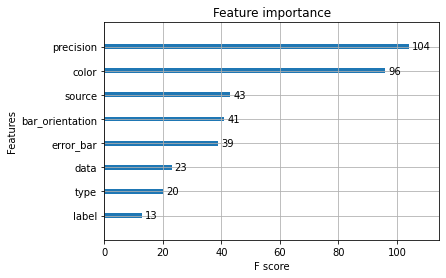

In [59]:
plot_importance(xgbregressor)
#plt.savefig('feature-imp.png')
plt.show()

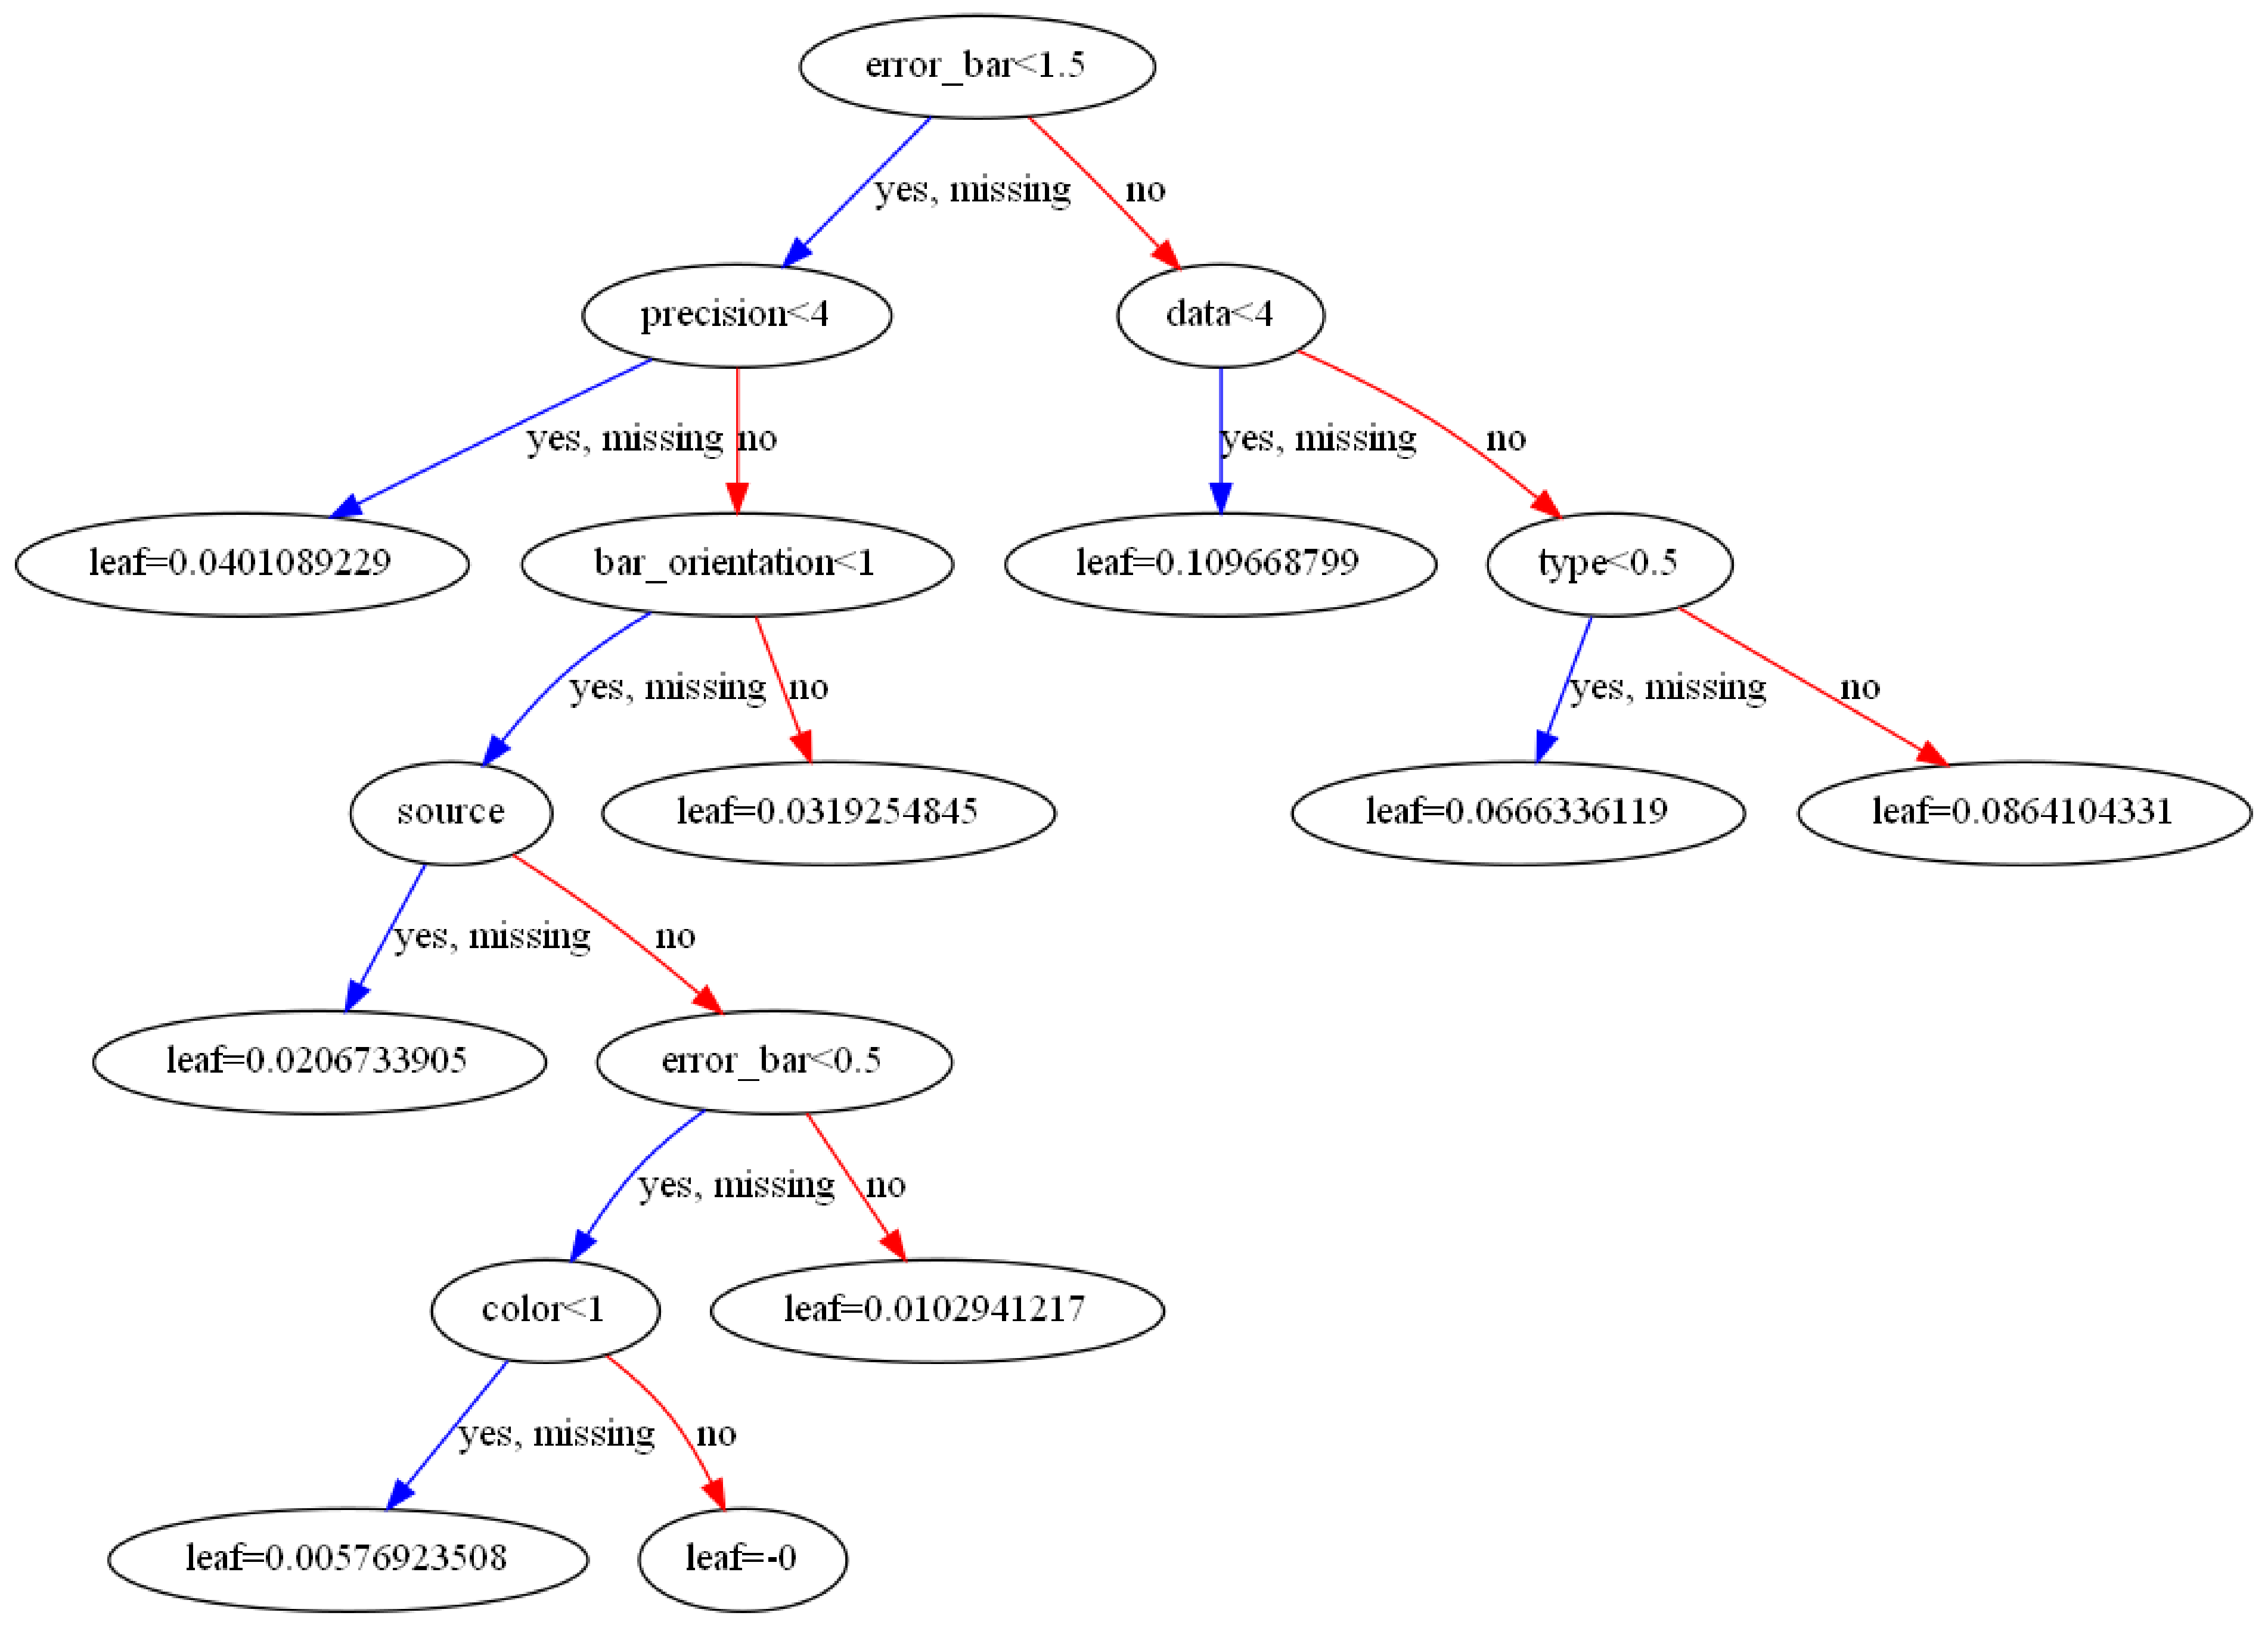

In [60]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50
plot_tree(xgbregressor)
#plt.savefig('XGBTree.png')
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
X_train.shape

(268, 9)

In [63]:
y_train.shape

(268,)

In [64]:
X_test.shape

(132, 9)

In [65]:
xgbregressor = XGBRegressor(n_estimators = 10, seed = 42)
xgbregressor.fit(X_train, y_train)
y_pred = xgbregressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.00298047633038861

In [66]:
# also tried with X_R and no significand improvement

In [67]:
viz_reg = pd.DataFrame(columns=['yes_R', 'yes_R_pred'])

In [68]:
viz_reg['yes_R'] = y_test
viz_reg['yes_R_pred'] = y_pred

In [69]:
df = viz_reg.reset_index(drop=True)
df.head()

,yes_R,yes_R_pred
0,0.900000,0.868290
1,0.927835,0.837248
2,0.627451,0.699597
3,0.883495,0.868290
4,0.725490,0.787874


In [70]:
#df.to_csv('regline.csv', index=True)

In [71]:
# use RL to tune params: MeSH

In [72]:
# sklearn.model_selection.HalvingGridSearchCV